In [ ]:
from pathlib import Path

from leaf_classification.gestion_experiences.gestionnaire_configuration import (
    GestionnaireConfiguration,
)
from leaf_classification.gestion_experiences.gestionnaire_experiences import (
    GestionnaireExperiences,
)

ROOT = Path.cwd().parent 


In [20]:
CONFIG_PATH = "../configs/experience.yaml"

gestion_config = GestionnaireConfiguration(CONFIG_PATH)
configuration = gestion_config.charger_configuration()
gestion_config.valider_configuration()

True

In [11]:
configuration["donnees"]["chemin_train_zip"] = (
    ROOT / configuration["donnees"]["chemin_train_zip"]
)

configuration["donnees"]["chemin_test_zip"] = (
    ROOT / configuration["donnees"]["chemin_test_zip"]
)

configuration["donnees"]["dossier_extraction"] = (
    ROOT / configuration["donnees"]["dossier_extraction"]
)

chemin_run = ROOT / configuration["sorties"]["dossier_runs"] / "final_benchmark"
chemin_run.mkdir(parents=True, exist_ok=True)

gestionnaire = GestionnaireExperiences(
    nom_experience="final_benchmark",
    chemin_run=chemin_run, 
    configuration=configuration,
)

resultats = gestionnaire.executer_experience_complete()

In [16]:
df = resultats["df_comparaison"]

colonnes_utiles = [
    "modele",
    "log_loss_moyenne",
    "accuracy_moyenne",
    "top_k_accuracy_moyenne",
    "log_loss_ecart_type",
    "accuracy_ecart_type",
]

df_clean = df[colonnes_utiles].copy()
df_clean = df_clean.round(4)
df_affichage = df_clean.rename(columns={
    "modele": "Modèle",
    "log_loss_moyenne": "Log-loss (CV)",
    "log_loss_ecart_type": "Log-loss (σ)",
    "accuracy_moyenne": "Accuracy (CV)",
    "accuracy_ecart_type": "Accuracy (σ)",
    "top_k_accuracy_moyenne": "Top-5 Accuracy (CV)",
})

df_affichage


,Modèle,Log-loss (CV),Accuracy (CV),Top-5 Accuracy (CV),Log-loss (σ),Accuracy (σ)
6,mlp_tuned,0.0780,0.9709,0.9987,0.0343,0.0057
2,mlp,0.0954,0.9785,0.9975,0.0378,0.0096
5,logistic_regression,0.1479,0.9848,1.0000,0.0206,0.0139
4,knn,0.3806,0.9419,0.9987,0.0964,0.0093
0,random_forest,0.8883,0.9823,0.9987,0.0255,0.0113
1,svm,2.5898,0.9836,0.9987,0.0222,0.0131
3,gradient_boosting,3.2185,0.5770,0.7248,0.5264,0.0491


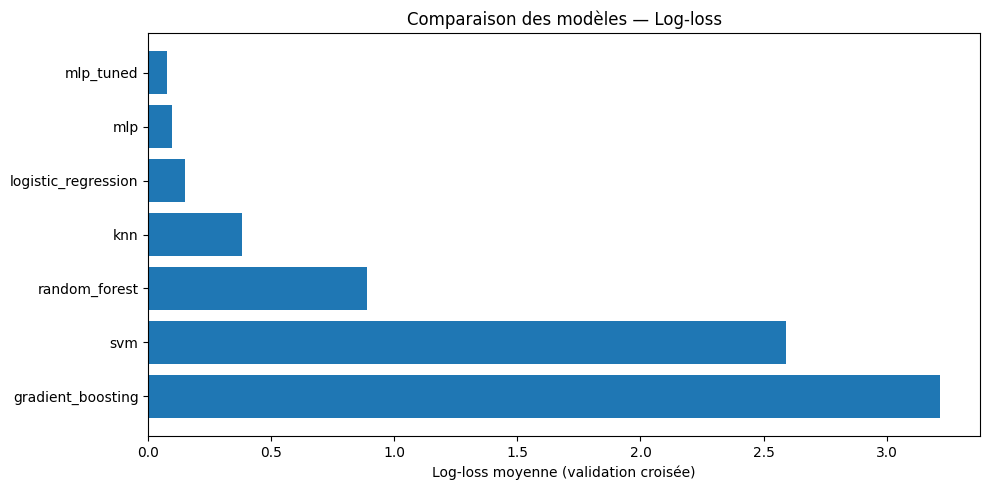

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(
    df_affichage["Modèle"],
    df_affichage["Log-loss (CV)"]
)
plt.xlabel("Log-loss moyenne (validation croisée)")
plt.title("Comparaison des modèles — Log-loss")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()